# Compare Results: Original vs RFGAP
This notebook loads and compares results from the `original` and `rfgap` folders for all available methods. It visualizes metrics such as accuracy, F1, recall, and precision for each method and metric.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up paths
base_path = '../data/results'
folders = ['original', 'rfgap']
methods = set()

# Find all result files in both folders
result_files = {folder: [] for folder in folders}
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    for fname in os.listdir(folder_path):
        if fname.endswith('.csv'):
            result_files[folder].append(fname)
            methods.add(fname.replace('_fold_daily.csv', ''))
methods = sorted(list(methods))

# Load all results into a dictionary: results[method][folder] = DataFrame
results = {method: {} for method in methods}
for folder in folders:
    for fname in result_files[folder]:
        method = fname.replace('_fold_daily.csv', '')
        fpath = os.path.join(base_path, folder, fname)
        results[method][folder] = pd.read_csv(fpath)

In [6]:
# Display the 'original' and 'rfgap' DataFrames for 'redcomets'
display(results["redcomets"]["original"])
display(results["redcomets"]["rfgap"])

,fold,train_idx,test_idx,rf_f1,rf_recall,rf_precision,rf_accuracy,knn_accuracy,knn_f1,knn_precision,knn_recall
0,0,[ 0 3 4 6 7 8 9 10 11 12 13 ...,[ 1 2 5 21 23 28 31 36 63 75 85 ...,0.796069,0.795181,0.840830,0.795181,NaN,NaN,NaN,NaN
1,1,[ 1 2 3 5 6 7 8 9 10 11 12 ...,[ 0 4 22 29 30 39 42 48 50 53 55 ...,0.763648,0.783133,0.796213,0.783133,NaN,NaN,NaN,NaN
2,2,[ 0 1 2 3 4 5 6 8 9 10 11 ...,[ 7 13 18 20 35 44 60 61 70 78 91 ...,0.827994,0.831325,0.844492,0.831325,NaN,NaN,NaN,NaN
3,3,[ 0 1 2 3 4 5 6 7 8 10 12 ...,[ 9 11 17 25 27 34 37 38 40 46 51 ...,0.719236,0.734940,0.733036,0.734940,NaN,NaN,NaN,NaN
4,4,[ 0 1 2 3 4 5 6 7 9 10 11 ...,[ 8 16 24 26 33 47 52 54 56 71 73 ...,0.748280,0.768293,0.787689,0.768293,NaN,NaN,NaN,NaN
5,5,[ 0 1 2 4 5 7 8 9 11 13 16 ...,[ 3 6 10 12 14 15 19 32 41 43 45 ...,0.673849,0.682927,0.724739,0.682927,NaN,NaN,NaN,NaN


,fold,train_idx,test_idx,rf_f1,rf_recall,rf_precision,rf_accuracy,knn_accuracy,knn_f1,knn_precision,knn_recall
0,0,[ 0 3 4 6 7 8 9 10 11 12 13 ...,[ 1 2 5 21 23 28 31 36 63 75 85 ...,0.771392,0.771084,0.824673,0.771084,NaN,NaN,NaN,NaN
1,1,[ 1 2 3 5 6 7 8 9 10 11 12 ...,[ 0 4 22 29 30 39 42 48 50 53 55 ...,0.765125,0.783133,0.800383,0.783133,NaN,NaN,NaN,NaN
2,2,[ 0 1 2 3 4 5 6 8 9 10 11 ...,[ 7 13 18 20 35 44 60 61 70 78 91 ...,0.784581,0.795181,0.810499,0.795181,NaN,NaN,NaN,NaN
3,3,[ 0 1 2 3 4 5 6 7 8 10 12 ...,[ 9 11 17 25 27 34 37 38 40 46 51 ...,0.718488,0.734940,0.731070,0.734940,NaN,NaN,NaN,NaN
4,4,[ 0 1 2 3 4 5 6 7 9 10 11 ...,[ 8 16 24 26 33 47 52 54 56 71 73 ...,0.728393,0.743902,0.802927,0.743902,NaN,NaN,NaN,NaN
5,5,[ 0 1 2 4 5 7 8 9 11 13 16 ...,[ 3 6 10 12 14 15 19 32 41 43 45 ...,0.686377,0.682927,0.773236,0.682927,NaN,NaN,NaN,NaN


## Plotting Helper Function
Define a function to plot metrics for each method, comparing original and rfgap results.

In [7]:
def plot_metric_comparison(method, metric, ax=None):
    """Plot a metric for a given method comparing original and rfgap."""
    data = []
    for folder in folders:
        if folder in results[method]:
            df = results[method][folder]
            for fold, value in zip(df['fold'], df[metric]):
                data.append({'Fold': fold, 'Value': value, 'Source': folder})
    plot_df = pd.DataFrame(data)
    if ax is None:
        ax = plt.gca()
    sns.lineplot(data=plot_df, x='Fold', y='Value', hue='Source', marker='o', ax=ax)
    ax.set_title(f'{method.upper()} - {metric}')
    ax.legend(title='Source')
    ax.grid(True)

## Plot All Metrics for Each Method
For each method, plot accuracy, F1, recall, and precision for both Random Forest and KNN, comparing original and rfgap results.


Method: FRESH


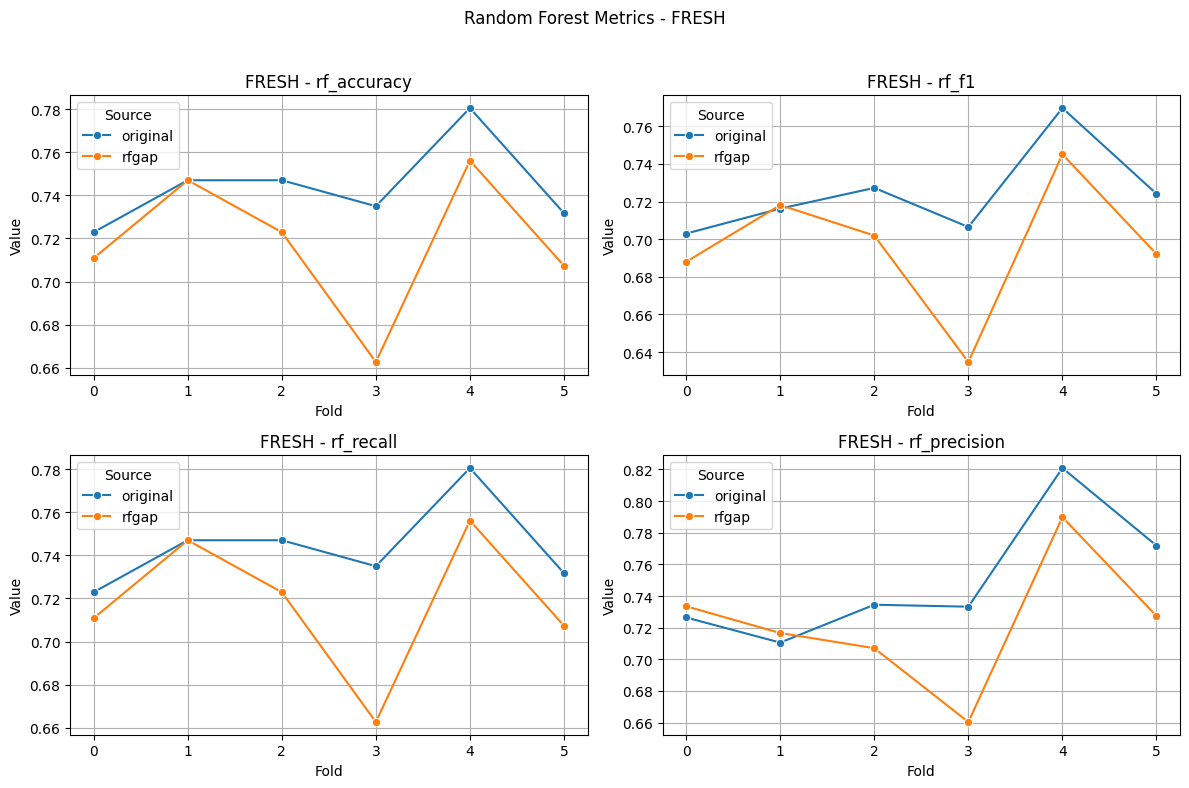

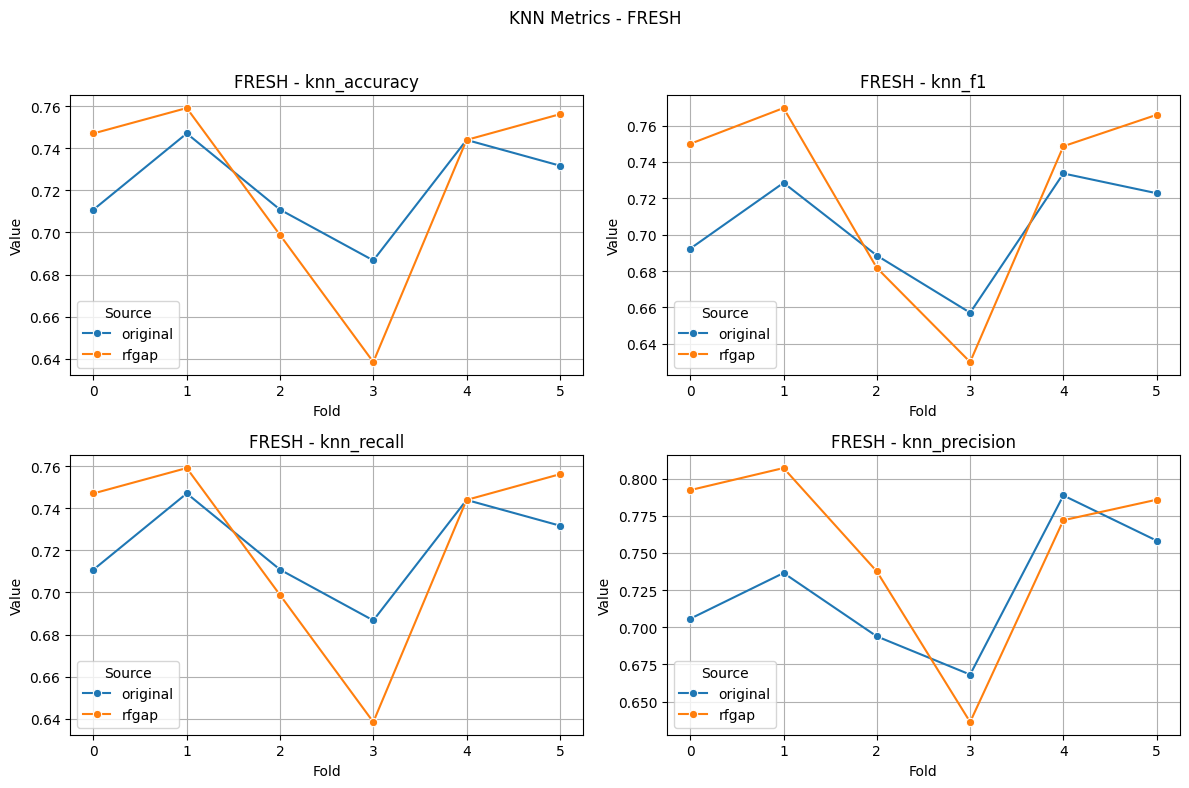


Method: QGAP


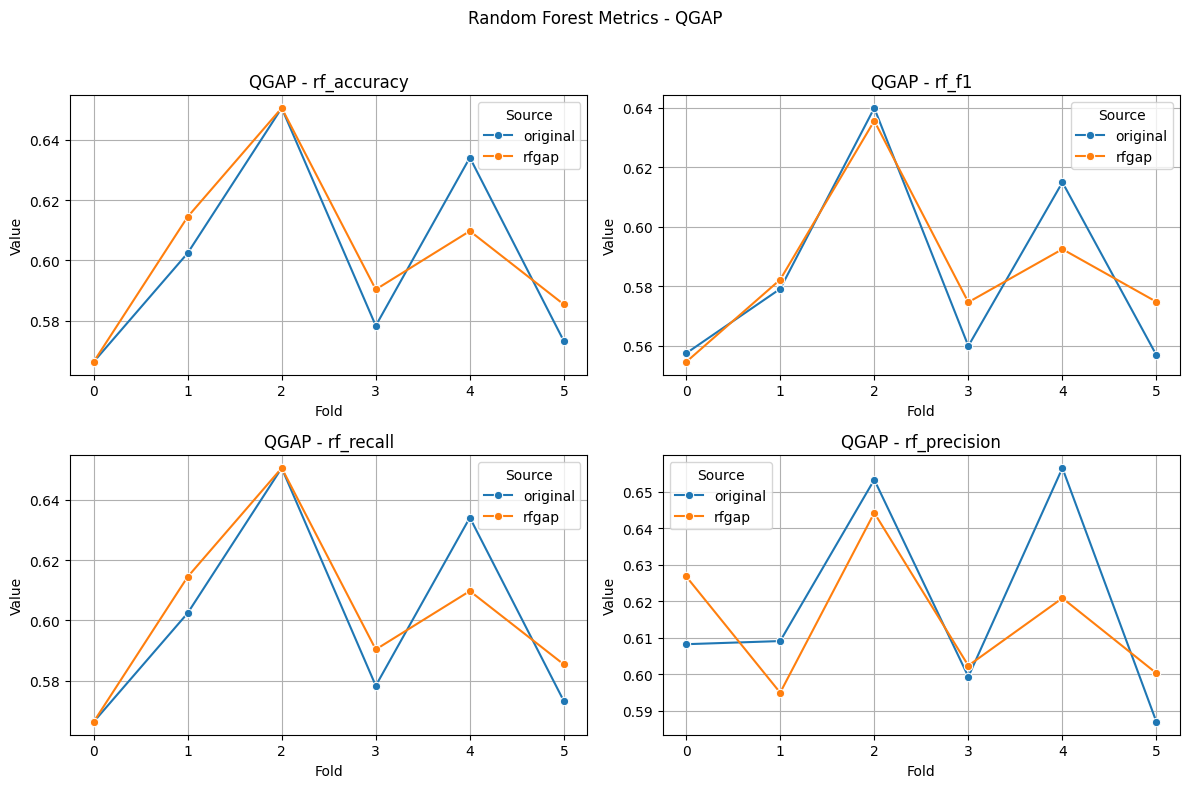

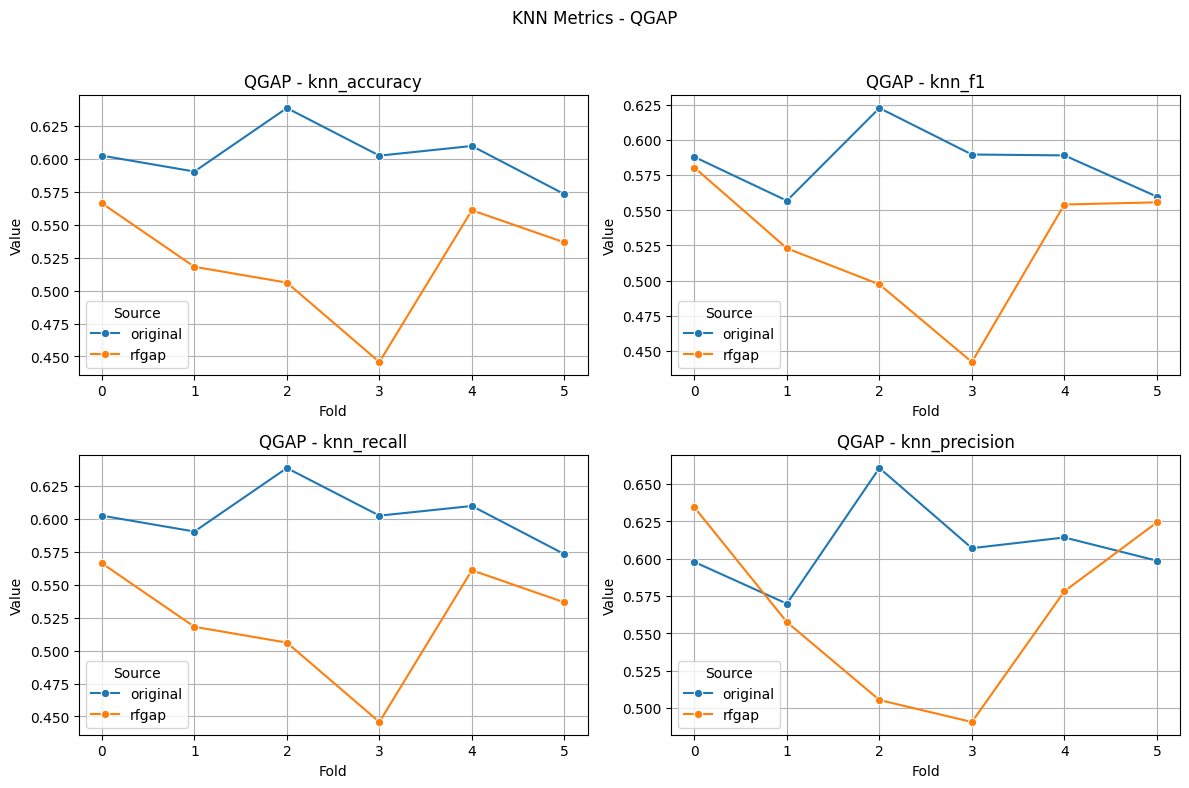


Method: RDST


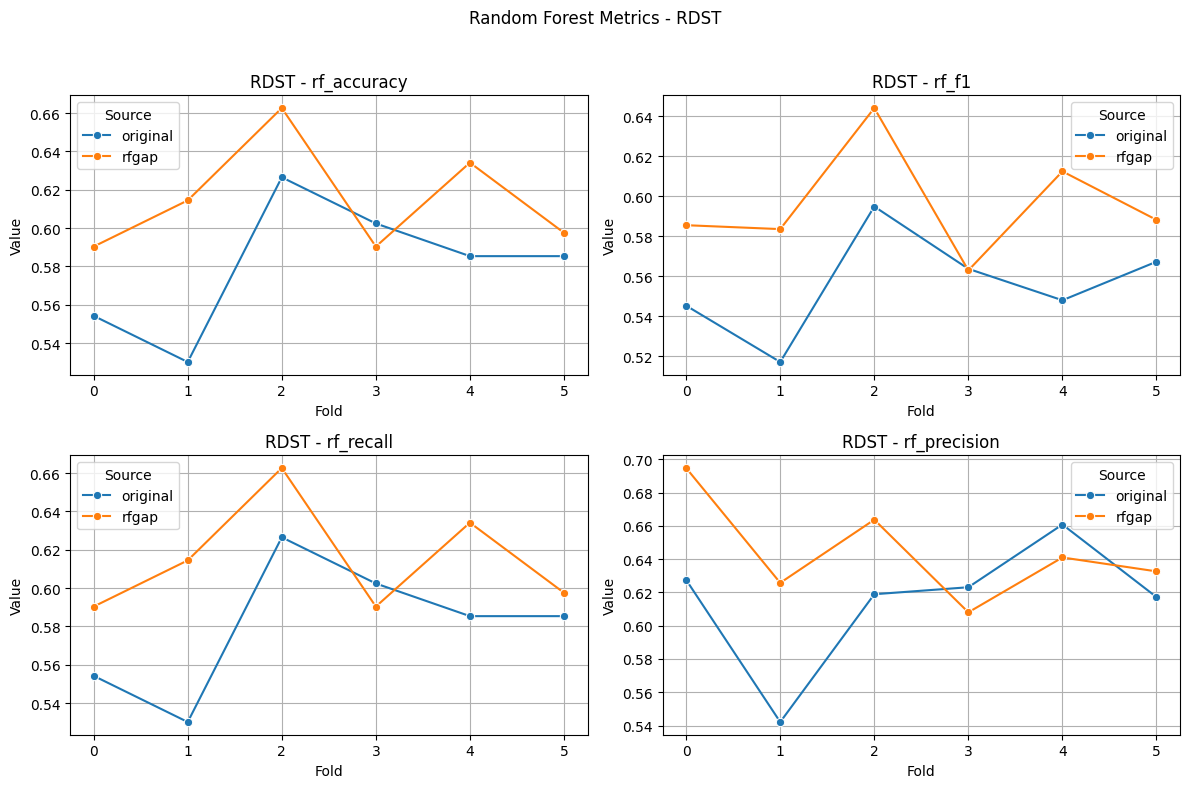

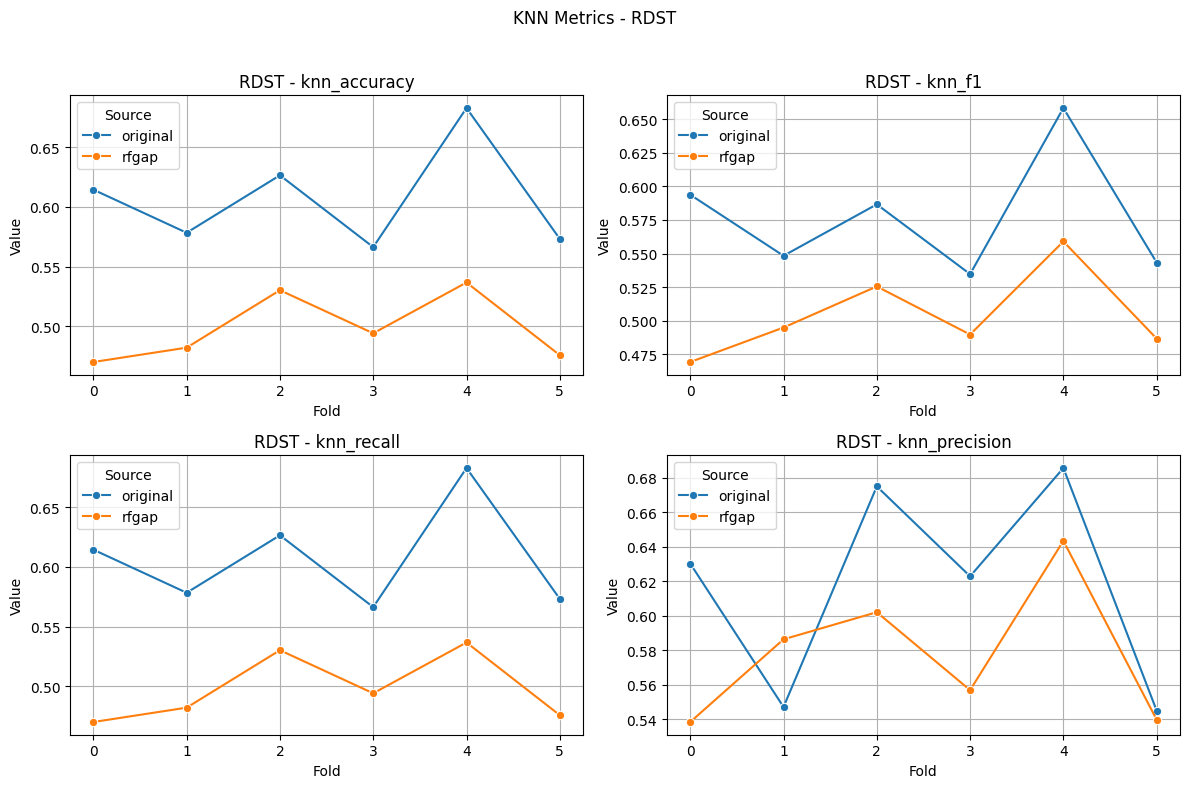


Method: REDCOMETS


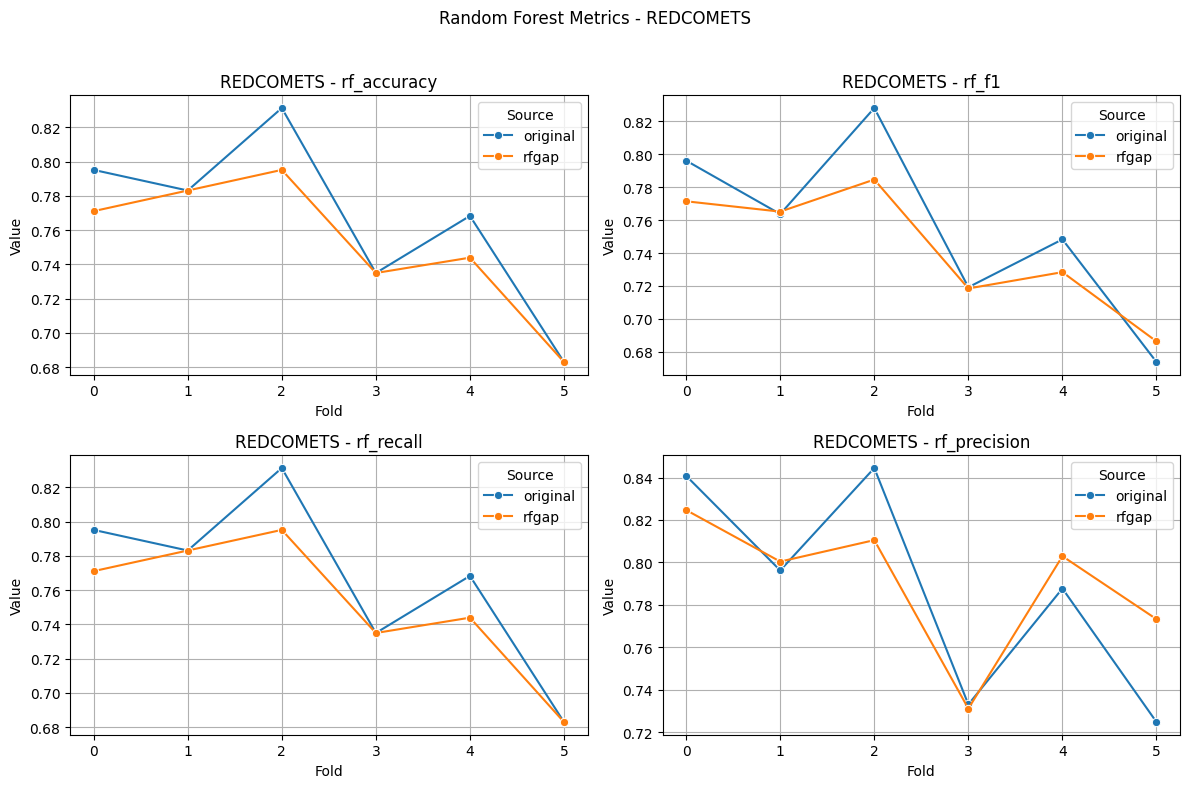

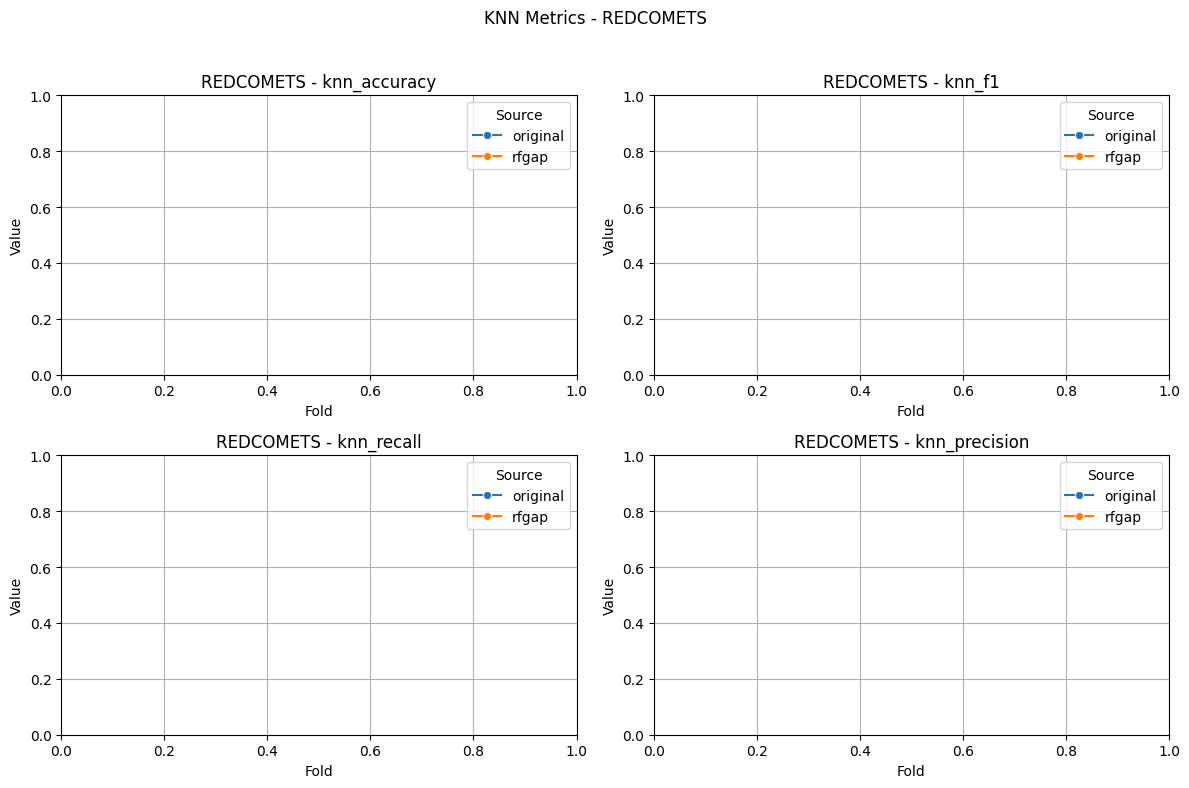


Method: ROCKET


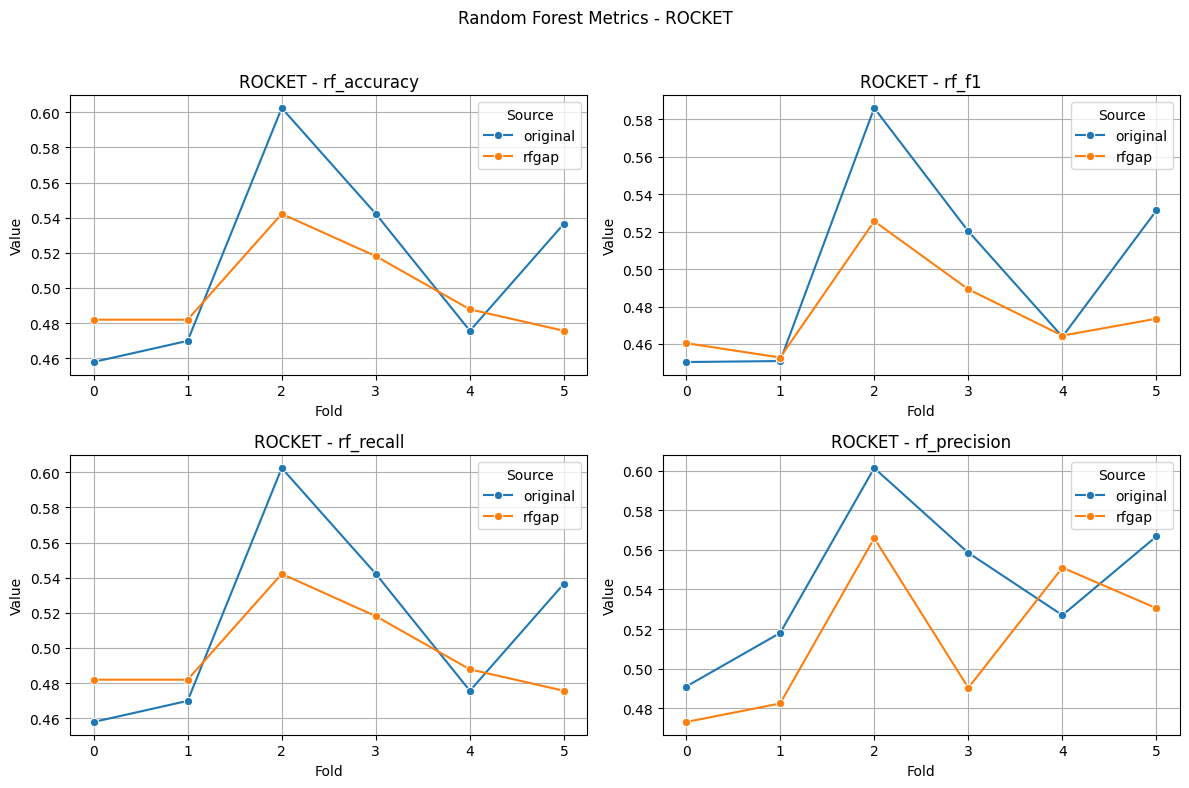

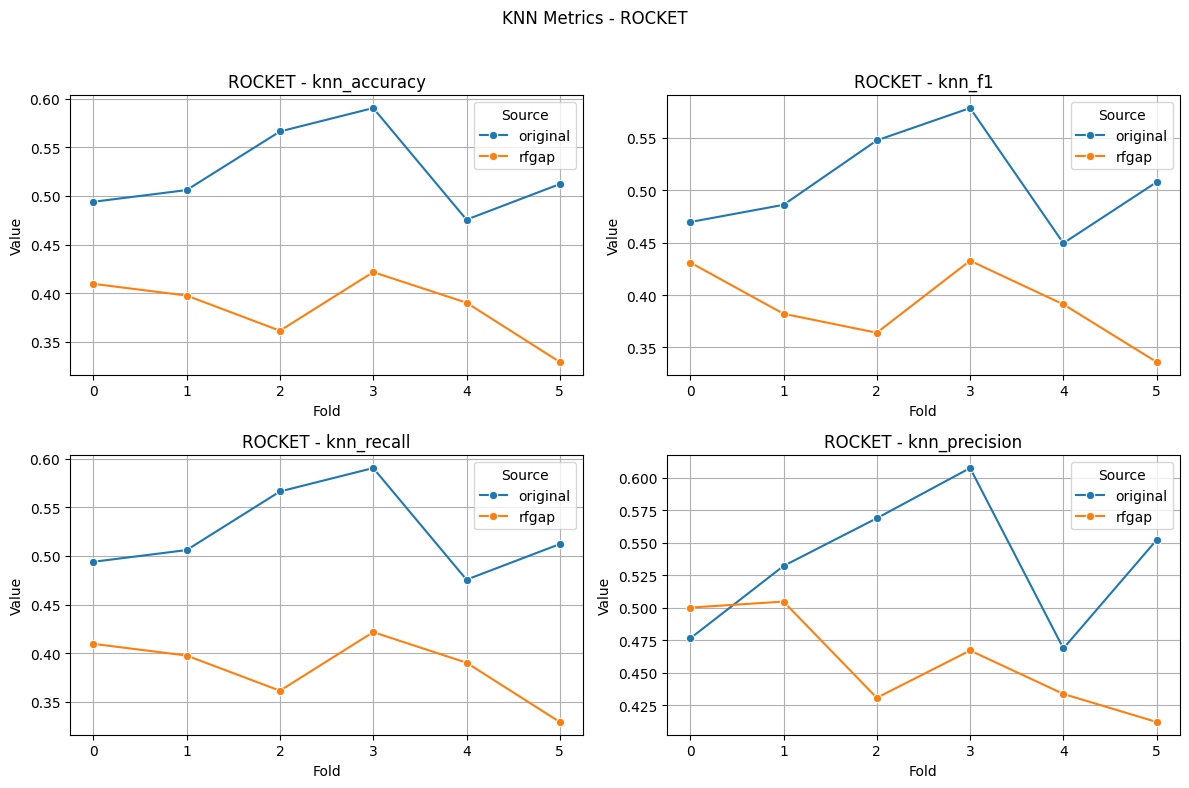

In [8]:
metrics_rf = ['rf_accuracy', 'rf_f1', 'rf_recall', 'rf_precision']
metrics_knn = ['knn_accuracy', 'knn_f1', 'knn_recall', 'knn_precision']

for method in methods:
    print(f'\nMethod: {method.upper()}')
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    for i, metric in enumerate(metrics_rf):
        plot_metric_comparison(method, metric, ax=axes[i//2, i%2])
    fig.suptitle(f'Random Forest Metrics - {method.upper()}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    for i, metric in enumerate(metrics_knn):
        plot_metric_comparison(method, metric, ax=axes[i//2, i%2])
    fig.suptitle(f'KNN Metrics - {method.upper()}')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

## Summary
This notebook provides a visual comparison of model performance between the original and RFGAP approaches for all available methods and metrics.

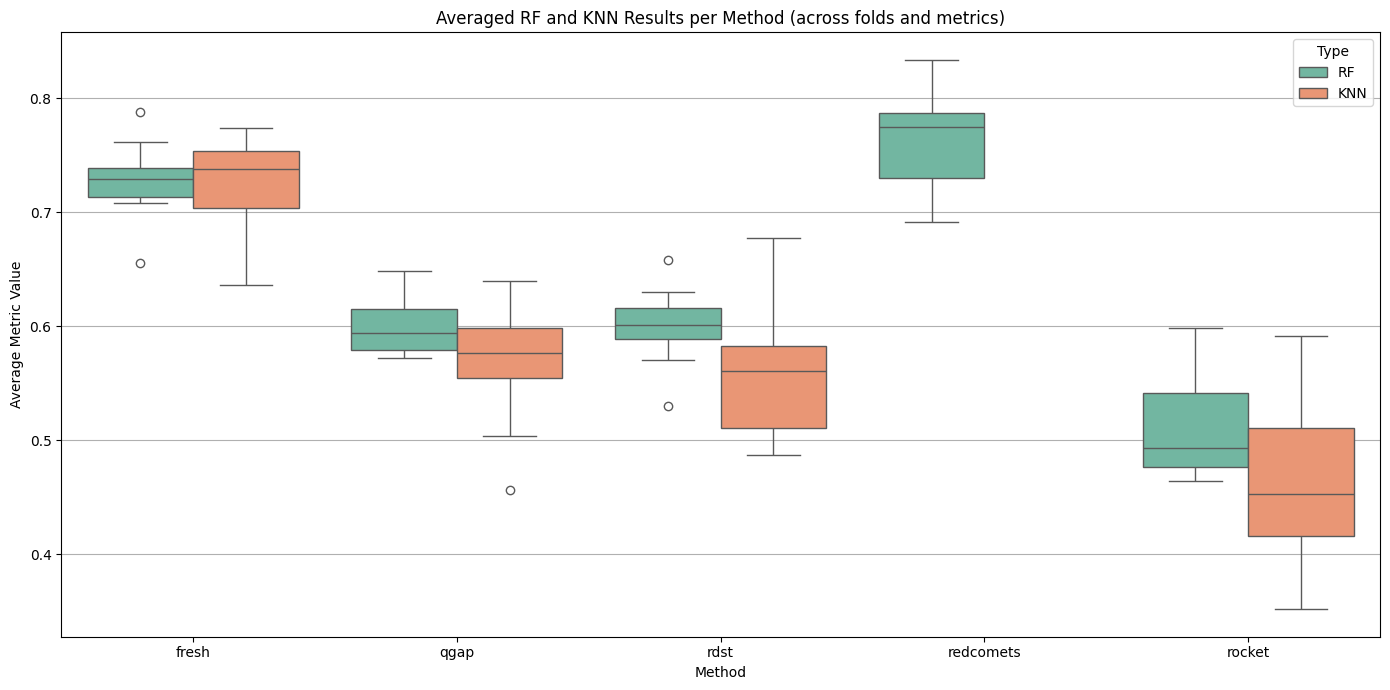

In [9]:
# Prepare data for boxplot: average RF and KNN metrics across folds for each method and source
plot_data = []
for method in methods:
    for source in folders:
        if source in results[method]:
            df = results[method][source]
            # Average RF metrics across folds
            rf_values = df[metrics_rf].mean(axis=1)
            # Average KNN metrics across folds
            knn_values = df[metrics_knn].mean(axis=1)
            # Store each fold's average as a separate sample for boxplot
            for val in rf_values:
                plot_data.append({'Method': method, 'Type': 'RF', 'Value': val, 'Source': source})
            for val in knn_values:
                plot_data.append({'Method': method, 'Type': 'KNN', 'Value': val, 'Source': source})

plot_df = pd.DataFrame(plot_data)

# Plot: Each method has two boxes (RF and KNN), colored by method, split by source (original/rfgap)
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=plot_df,
    x='Method',
    y='Value',
    hue='Type',
    palette='Set2',
    dodge=True
)
plt.title('Averaged RF and KNN Results per Method (across folds and metrics)')
plt.ylabel('Average Metric Value')
plt.xlabel('Method')
plt.legend(title='Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

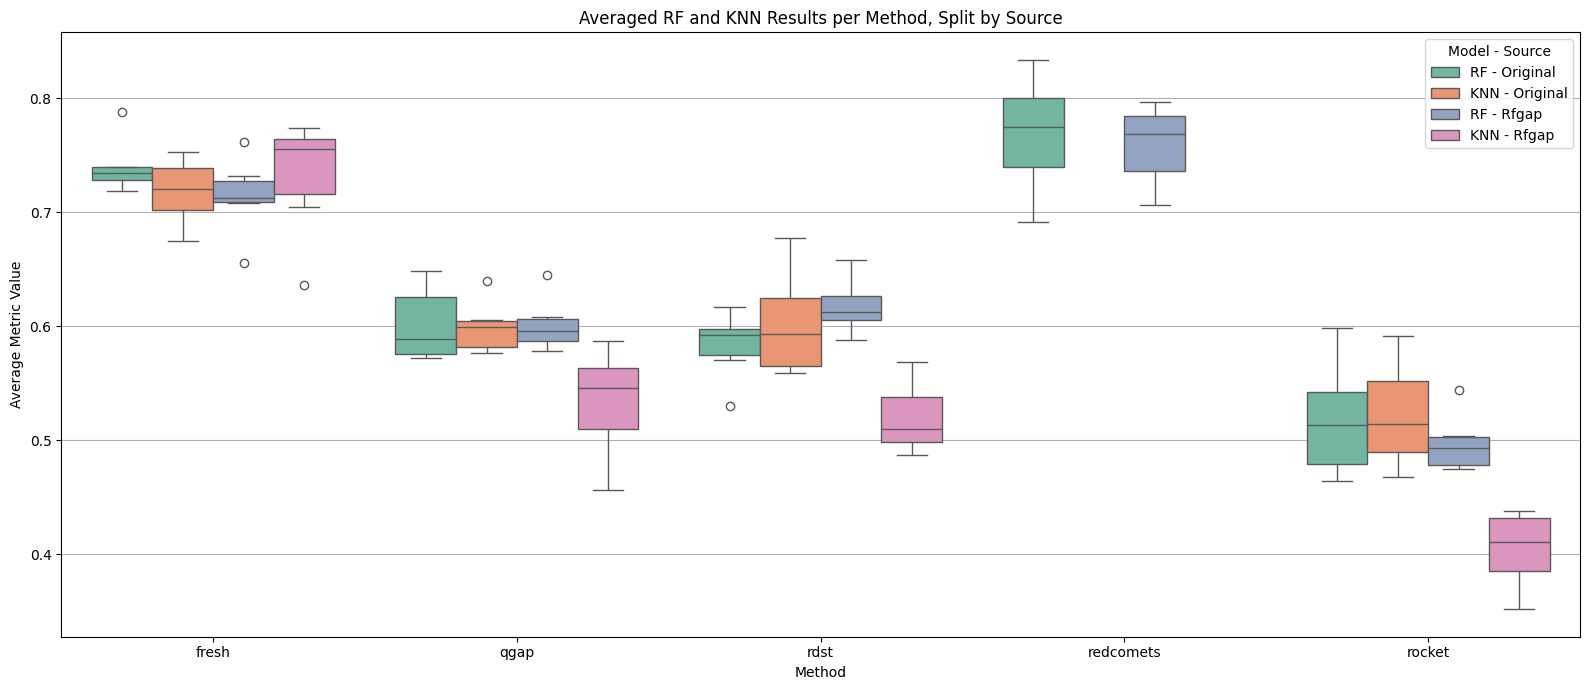

In [10]:
# Add a combined column for Type and Source
plot_df['Type_Source'] = plot_df['Type'] + ' - ' + plot_df['Source'].str.capitalize()

plt.figure(figsize=(16, 7))
sns.boxplot(
    data=plot_df,
    x='Method',
    y='Value',
    hue='Type_Source',
    palette='Set2',
    dodge=True
)
plt.title('Averaged RF and KNN Results per Method, Split by Source')
plt.ylabel('Average Metric Value')
plt.xlabel('Method')
plt.legend(title='Model - Source')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Compare KNN Distance Modes
This section compares the performance of different KNN distance metrics (cosine, dtw, euclid, manhattan, soft_dtw, soft_dtw_normalized) using box and whisker plots for accuracy, F1, precision, and recall.

In [11]:
import glob

# Path to distance results
distance_path = '../data/results/distances/'
distance_files = glob.glob(os.path.join(distance_path, '*_knn_results.csv'))

# Map file names to readable mode names
mode_map = {
    'cosine': 'Cosine',
    'dtw': 'DTW',
    'euclid': 'Euclidean',
    'manhattan': 'Manhattan',
    'soft_dtw': 'Soft-DTW',
    'soft_dtw_normalized': 'Soft-DTW-Norm'
}

# Load all distance results
distance_data = []
for f in distance_files:
    mode = os.path.basename(f).replace('_knn_results.csv', '')
    mode_label = mode_map.get(mode, mode)
    df = pd.read_csv(f)
    for _, row in df.iterrows():
        for metric in ['accuracy', 'f1', 'precision', 'recall']:
            distance_data.append({
                'Mode': mode_label,
                'Metric': metric.capitalize(),
                'Value': row[metric],
                'Fold': row['fold']
            })
distance_df = pd.DataFrame(distance_data)

/tmp/ipykernel_943824/2143454030.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_943824/2143454030.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_943824/2143454030.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_943824/2143454030.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_943824/2143454030.py:6: FutureWarning

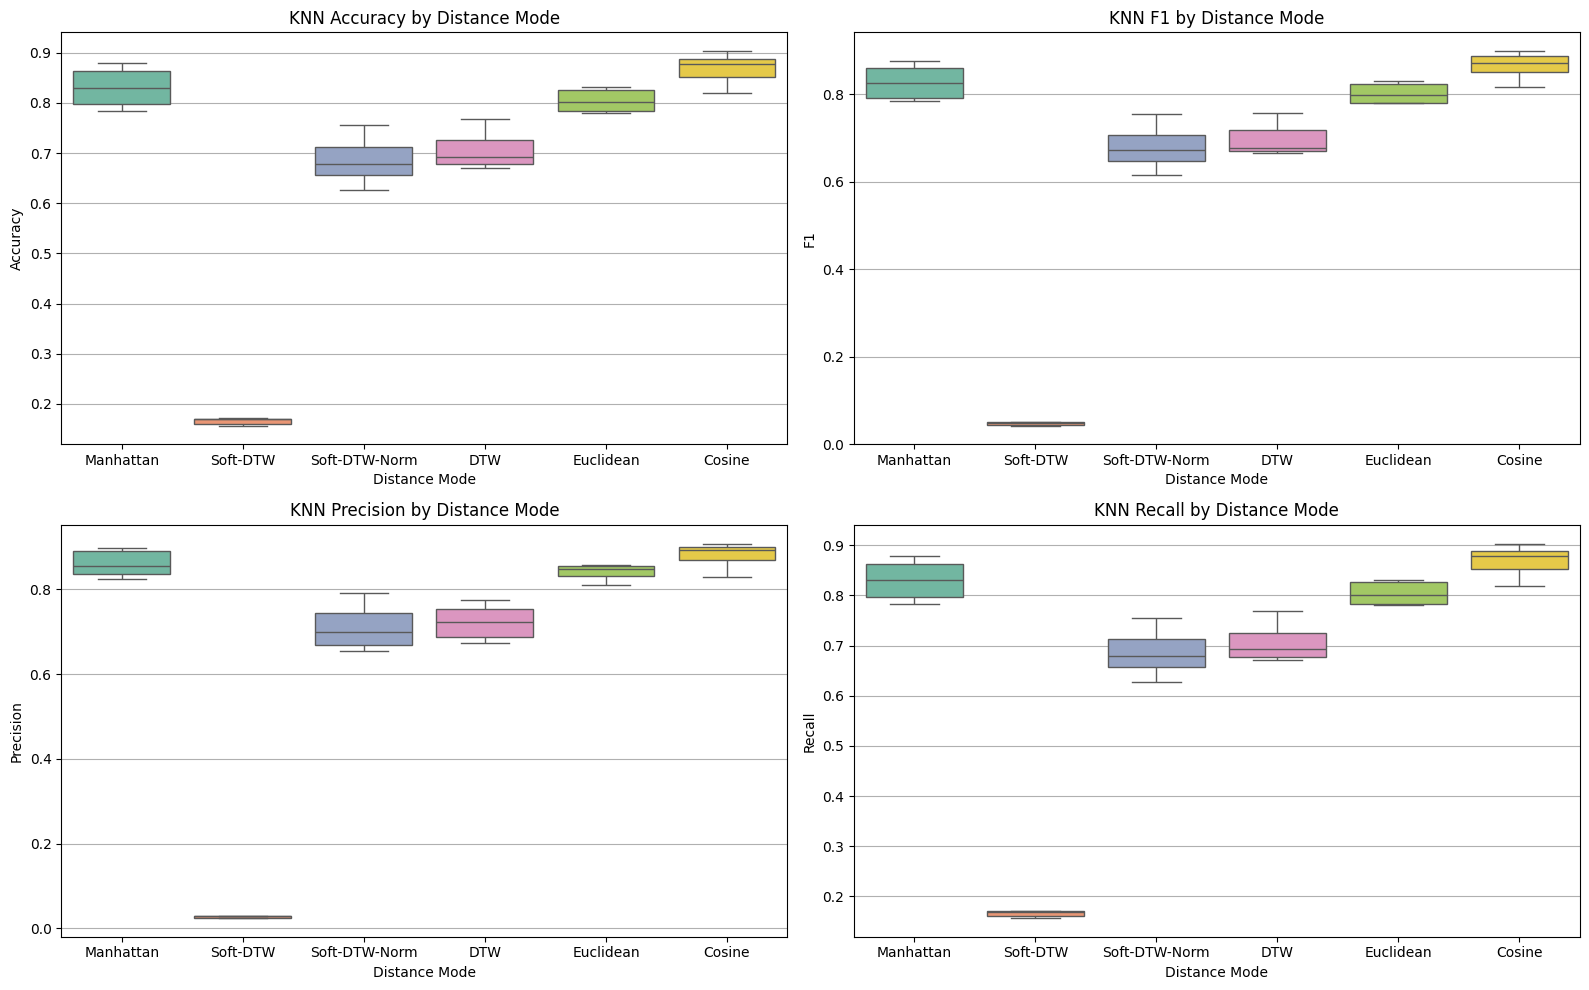

In [16]:
# Plot boxplots for each metric
metrics = ['Accuracy', 'F1', 'Precision', 'Recall']
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.boxplot(
        data=distance_df[distance_df['Metric'] == metric],
        x='Mode',
        y='Value',
        palette='Set2',
        ax=ax
    )
    ax.set_title(f'KNN {metric} by Distance Mode')
    ax.set_ylabel(metric)
    ax.set_xlabel('Distance Mode')
    ax.grid(axis='y')
plt.tight_layout()
plt.show()

These plots allow you to visually compare the distribution of KNN performance metrics across all distance modes.

# Compare All Models Across Methods and Distances
This section compares the performance of all models (including the main methods and all KNN distance modes) in a single set of box and whisker plots for accuracy, F1, precision, and recall.

In [17]:
# Prepare a combined DataFrame for all models and modes
combined_data = []

# Add main methods (original/rfgap) - KNN only for fair comparison
for method in methods:
    for source in folders:
        if source in results[method]:
            df = results[method][source]
            for _, row in df.iterrows():
                for metric, label in zip(metrics_knn, ['Accuracy', 'F1', 'Precision', 'Recall']):
                    combined_data.append({
                        'Model': f'{method.capitalize()} ({source})',
                        'Metric': label,
                        'Value': row[metric],
                        'Fold': row['fold']
                    })

# Add all distance-based KNN modes
for _, row in distance_df.iterrows():
    combined_data.append({
        'Model': row['Mode'],
        'Metric': row['Metric'],
        'Value': row['Value'],
        'Fold': row['Fold']
    })

combined_df = pd.DataFrame(combined_data)

/tmp/ipykernel_943824/1469370671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_943824/1469370671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_943824/1469370671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_943824/1469370671.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_943824/1469370671.py:6: FutureWarning

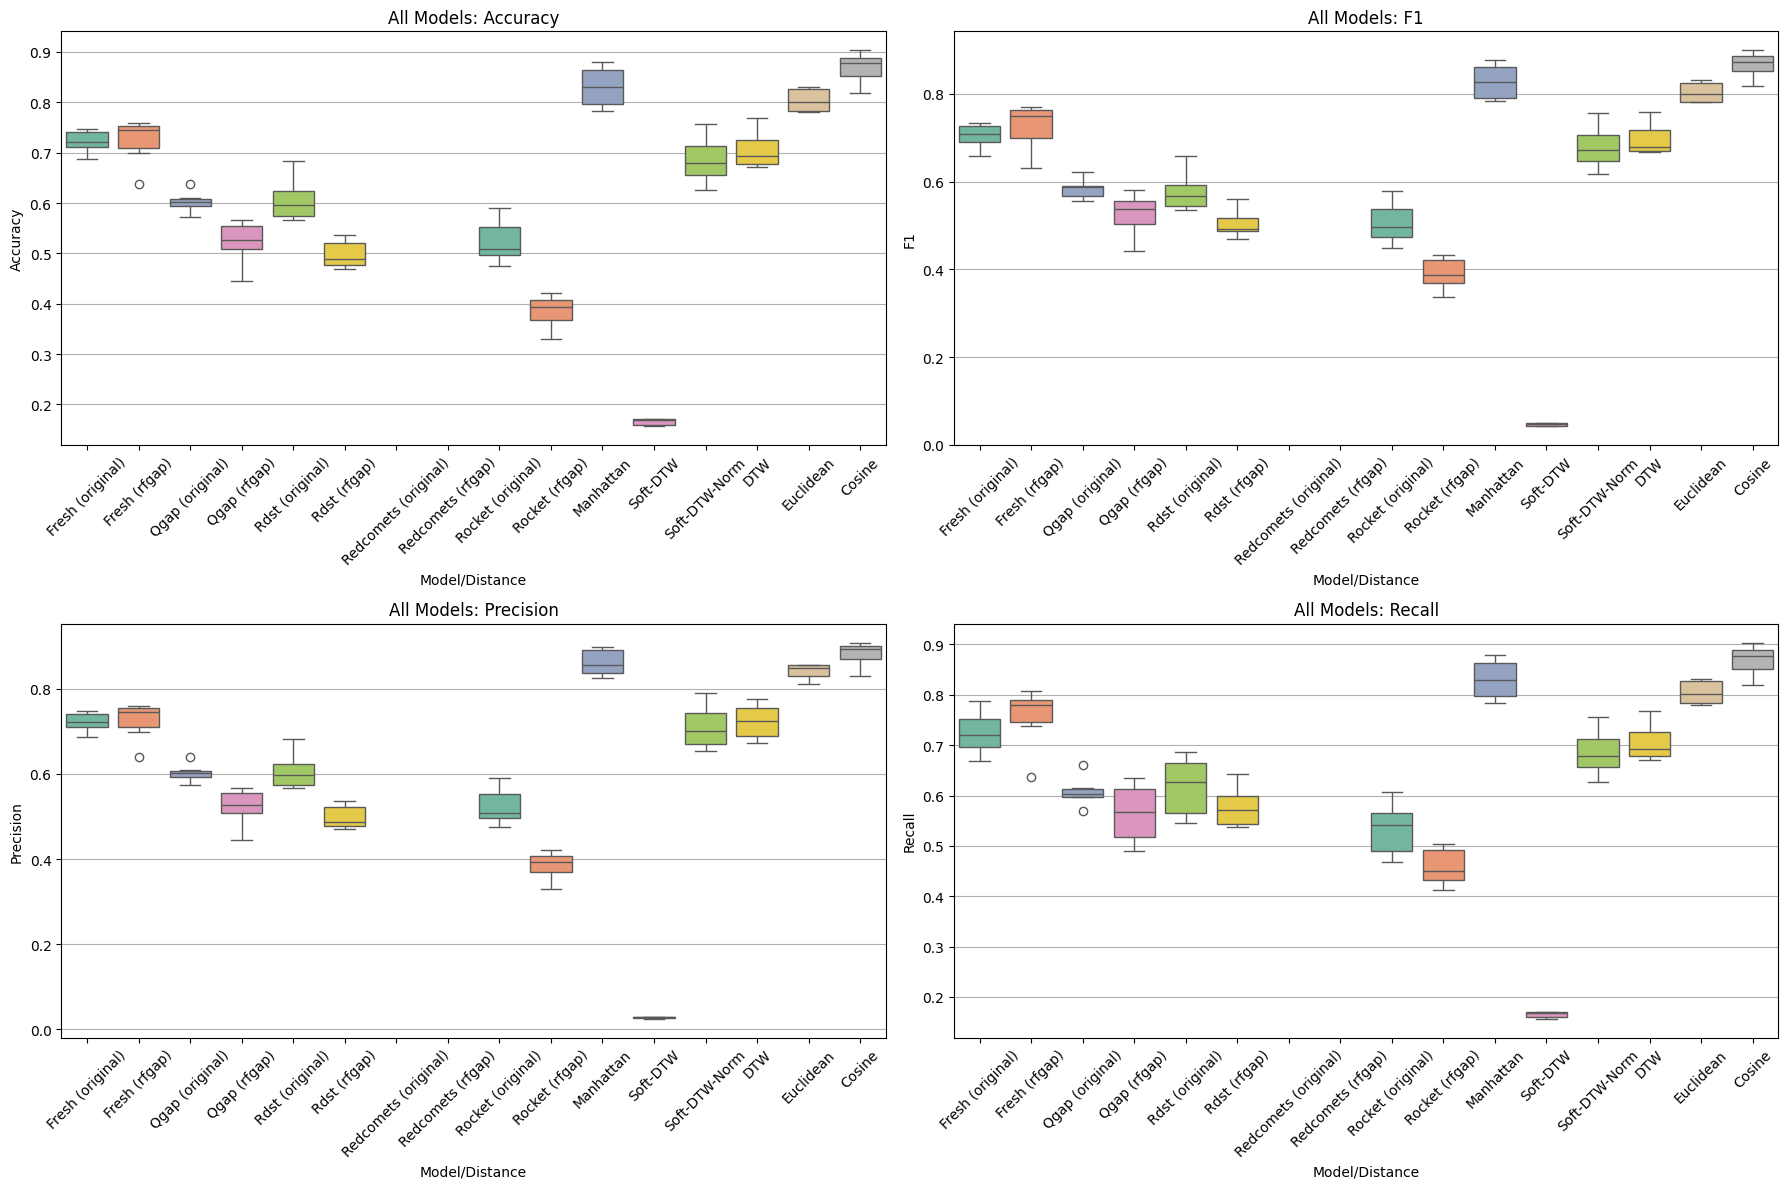

In [18]:
# Plot boxplots for each metric, comparing all models and distance modes
metrics = ['Accuracy', 'F1', 'Precision', 'Recall']
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.boxplot(
        data=combined_df[combined_df['Metric'] == metric],
        x='Model',
        y='Value',
        palette='Set2',
        ax=ax
    )
    ax.set_title(f'All Models: {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model/Distance')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y')
plt.tight_layout()
plt.show()

These plots allow you to compare the distribution of KNN performance metrics for all main methods and all distance-based KNN modes in one view.